<a href="https://colab.research.google.com/github/nandaglhp/PCVK_Ganjil_2023/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import cv2 as cv  # Library OpenCV untuk pemrosesan gambar dan video.
import numpy as np  # Library NumPy untuk operasi numerik.
from PIL import Image  # Modul dari library Pillow untuk bekerja dengan gambar.
import math  # Library matematika Python untuk operasi matematika.
import matplotlib.pyplot as plt  # Library Matplotlib untuk visualisasi data.
from google.colab.patches import cv2_imshow  # Modul untuk menampilkan gambar dalam Google Colab.
from math import log10, sqrt  # Impor fungsi logaritma dan akar kuadrat dari modul matematika.
import glob  # Library glob untuk pencarian file dengan pola.


# Tugas Praktikum

## 1. Buat Gamma Correction sesuai dengan petunjuk berikut

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


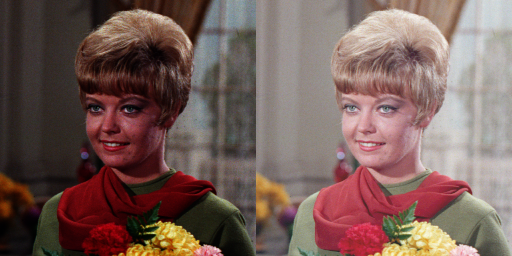

In [26]:
# path
image_path = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/Pertemuan-05/female.tiff'

# Membaca gambar dari path yang telah ditentukan
image = cv.imread(image_path)
gamma_image = np.zeros(image.shape, image.dtype)

print(' Gamma Correction pada citra ')
print('----------------------------------')

try:
  # Mengambil nilai Gamma dari input pengguna, diasumsikan sebagai bilangan bulat
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  # Menampilkan pesan kesalahan jika input bukan bilangan bulat
  print('Error, not a number')

# Melakukan perulangan untuk setiap piksel gambar
for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    for c in range(image.shape[2]):
      # Menghitung nilai gamma correction pada setiap saluran warna (RGB)
      gamma_image[y, x, c] = np.clip(255 * pow(image[y, x, c] / 255, (1 / gamma)), 0, 255)

# Menggabungkan gambar asli dan gambar yang sudah diberi gamma correction
final_frame = cv.hconcat((image, gamma_image))

# Menampilkan hasilnya menggunakan cv2_imshow (untuk Google Colab)
cv2_imshow(final_frame)


## 2. Buat Simulasi Image Depth

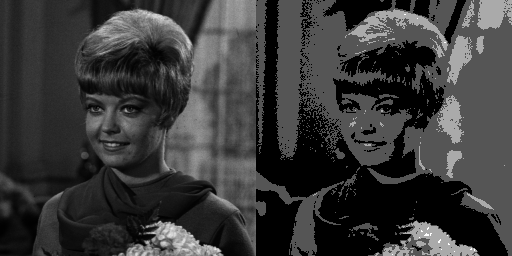

In [32]:
# Menentukan bit depth gambar yang diinginkan
bit_depth = 2

# Menghitung level (nilai yang merepresentasikan satu langkah dalam bit depth)
level = 255 / (pow(2, bit_depth) - 1)

# Path ke gambar yang akan diolah
image_path = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/Pertemuan-05/female.tiff'

# Memuat gambar dengan mode grayscale (gambar hitam putih)
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Membuat gambar dengan bit depth yang diinginkan
image_depth = np.zeros(image.shape, image.dtype)

# Melakukan perulangan untuk setiap piksel dalam gambar
for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    # Menghitung nilai baru untuk setiap piksel berdasarkan bit depth yang ditentukan
    image_depth[y, x] = np.clip(round(image[y, x] / level) * level, 0, 255)

# Menggabungkan gambar asli dengan gambar yang memiliki bit depth yang disesuaikan
final_frame = cv.hconcat((image, image_depth))

# Menampilkan hasilnya menggunakan cv2_imshow (untuk Google Colab)
cv2_imshow(final_frame)


## 3. Buat modul Average Denoising

27.540484832630717  db


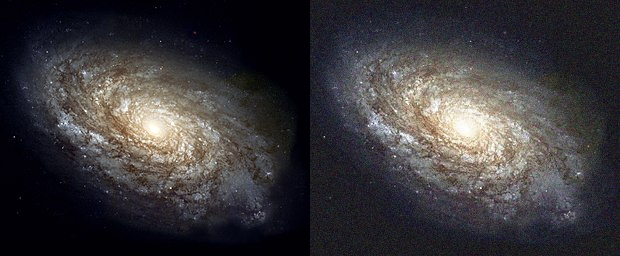

In [36]:
cv_img = []
path_noises = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/noises/*.jpg'
for img in glob.glob(path_noises):
  n = cv.imread(img)
  cv_img.append(n)

path_ori = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/galaxy.jpg'
ori = cv.imread(path_ori)
noise_image = cv_img[5]

#index mulai 0
for i in range(5):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(ori, compressed):
    mse = np.mean((ori - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = noise_image
psnr = PSNR(ori, compressed)
print(psnr , ' db')

final_frame = cv.hconcat((ori, noise_image))
cv2_imshow(final_frame)

27.546525664752963  db


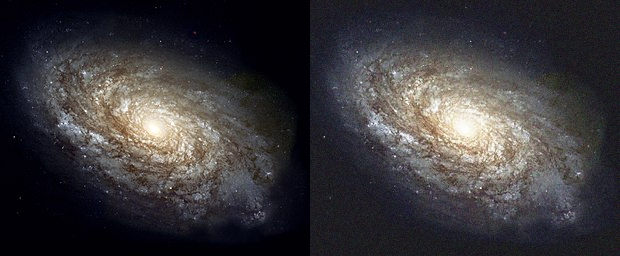

In [37]:
cv_img = []
path_noises = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/noises/*.jpg'
for img in glob.glob(path_noises):
  n = cv.imread(img)
  cv_img.append(n)

path_ori = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/galaxy.jpg'
ori = cv.imread(path_ori)
noise_image = cv_img[10]

#index mulai 0
for i in range(10):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(ori, compressed):
    mse = np.mean((ori - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = noise_image
psnr = PSNR(ori, compressed)
print(psnr , ' db')

final_frame = cv.hconcat((ori, noise_image))
cv2_imshow(final_frame)

27.543794450326633  db


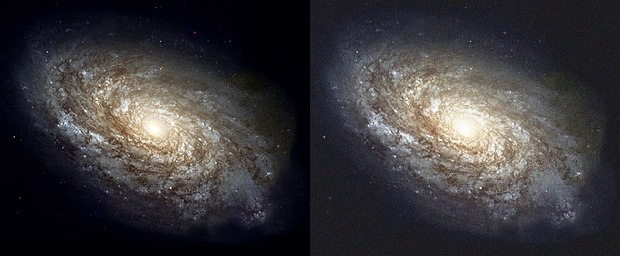

In [38]:
cv_img = []
path_noises = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/noises/*.jpg'
for img in glob.glob(path_noises):
  n = cv.imread(img)
  cv_img.append(n)

path_ori = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/galaxy.jpg'
ori = cv.imread(path_ori)
noise_image = cv_img[20]

#index mulai 0
for i in range(20):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(ori, compressed):
    mse = np.mean((ori - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = noise_image
psnr = PSNR(ori, compressed)
print(psnr , ' db')

final_frame = cv.hconcat((ori, noise_image))
cv2_imshow(final_frame)

27.510769632824783  db


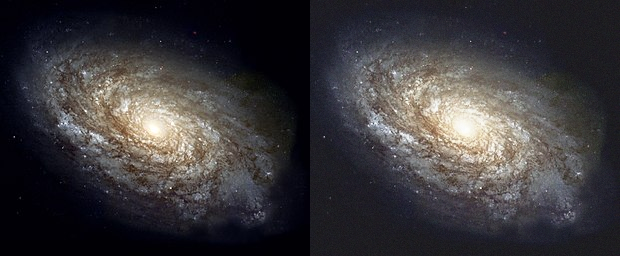

In [39]:
cv_img = []
path_noises = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/noises/*.jpg'
for img in glob.glob(path_noises):
  n = cv.imread(img)
  cv_img.append(n)

path_ori = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/galaxy.jpg'
ori = cv.imread(path_ori)
noise_image = cv_img[40]

#index mulai 0
for i in range(40):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(ori, compressed):
    mse = np.mean((ori - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = noise_image
psnr = PSNR(ori, compressed)
print(psnr , ' db')

final_frame = cv.hconcat((ori, noise_image))
cv2_imshow(final_frame)

27.498737651900917  db


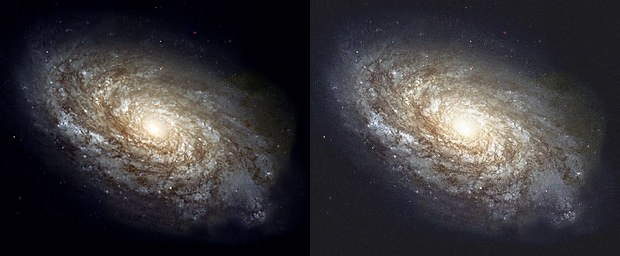

In [40]:
cv_img = []
path_noises = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/noises/*.jpg'
for img in glob.glob(path_noises):
  n = cv.imread(img)
  cv_img.append(n)

path_ori = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/galaxy.jpg'
ori = cv.imread(path_ori)
noise_image = cv_img[80]

#index mulai 0
for i in range(80):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(ori, compressed):
    mse = np.mean((ori - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = noise_image
psnr = PSNR(ori, compressed)
print(psnr , ' db')

final_frame = cv.hconcat((ori, noise_image))
cv2_imshow(final_frame)

27.49983985799323  db


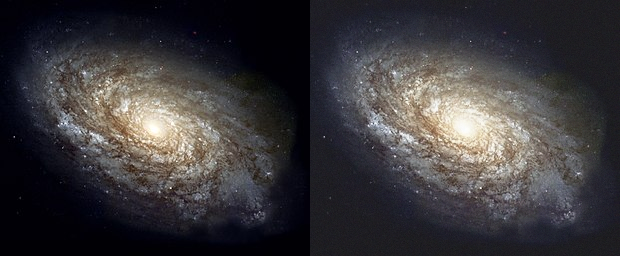

In [43]:
cv_img = []
path_noises = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/noises/*.jpg'
for img in glob.glob(path_noises):
  n = cv.imread(img)
  cv_img.append(n)

path_ori = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/galaxy.jpg'
ori = cv.imread(path_ori)
noise_image = cv_img[99]

#index mulai 0
for i in range(99):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(ori, compressed):
    mse = np.mean((ori - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = noise_image
psnr = PSNR(ori, compressed)
print(psnr , ' db')

final_frame = cv.hconcat((ori, noise_image))
cv2_imshow(final_frame)

## Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah...

saat meningkatkan bobot denoising, nilai PSNR juga meningkat. ini menunjukkan bahwa semakin tinggi bobot, semakin baik kualitas restorasi gambarnya. dari eksperimen ini, kita dapat mencari tingkat denoising yang memberikan nilai PNSR yang ideal.

## Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:

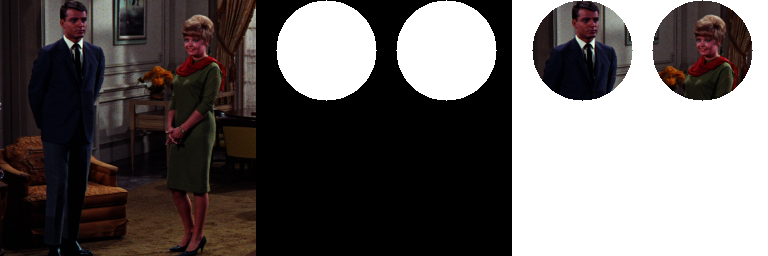

In [50]:
path = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/couple.tiff'
img = cv.imread(path)

# Masker ini akan memiliki nilai piksel putih (255)
# di dalam lingkaran dan hitam (0) di luar lingkaran.

mask1 = np.zeros(img.shape, dtype=np.uint8)
mask1 = cv.circle(mask1, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask1, (190, 50), 50, (255,255,255), -1)

# Menggabungkan kedua masker menggunakan operator bitwise AND,
# sehingga hanya piksel yang berada dalam kedua masker yang tetap
# ada dalam gambar hasil (result).

result = img & mask1 & mask2

# Mengatur semua piksel yang tidak termasuk dalam masker (nilai mask == 0)
# menjadi putih (255) dalam gambar hasil.
result[mask1==0] = 255

final_frame = cv.hconcat((img, mask1, result))
cv2_imshow(final_frame)

## Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

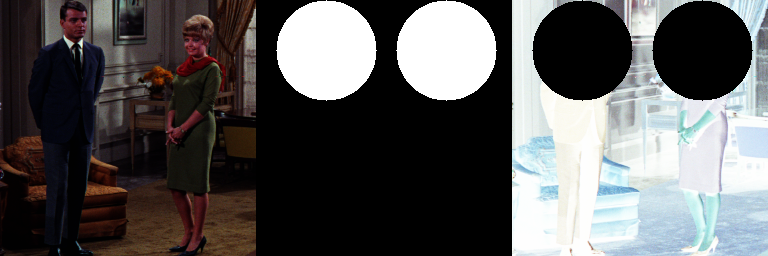

In [52]:
# NOT
path = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/couple.tiff'
img = cv.imread(path)
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = ~img & ~mask & ~mask2
# result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

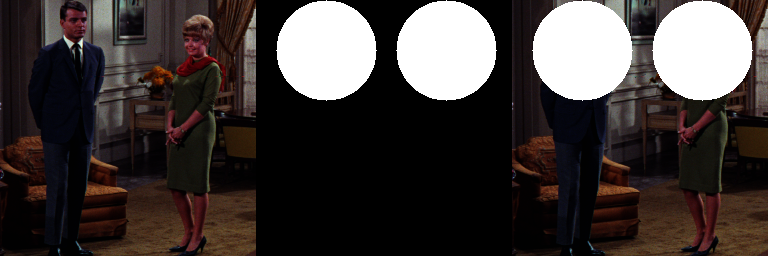

In [47]:
# Operator OR
path = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/couple.tiff'
img = cv.imread(path)
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = img | mask | mask2
# result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

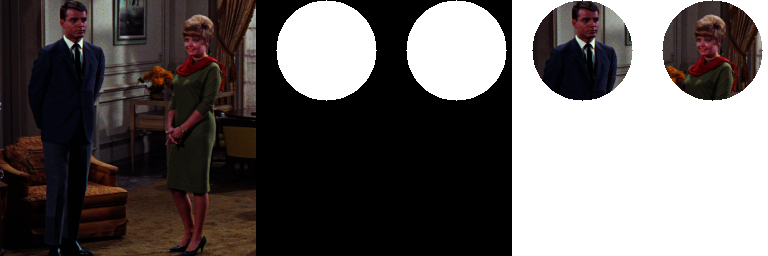

In [48]:
# AND
path = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/couple.tiff'
img = cv.imread(path)
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255, 255, 255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (200, 50), 50, (255, 255, 255), -1)

masked = img & mask & mask2
masked[mask==0] = 255

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

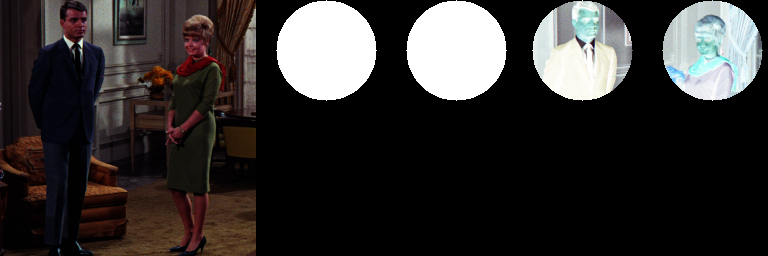

In [49]:
# NAND

mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255, 255, 255), -1)
mask = cv.circle(mask, (200, 50), 50, (255, 255, 255), -1)

masked = ~img & mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

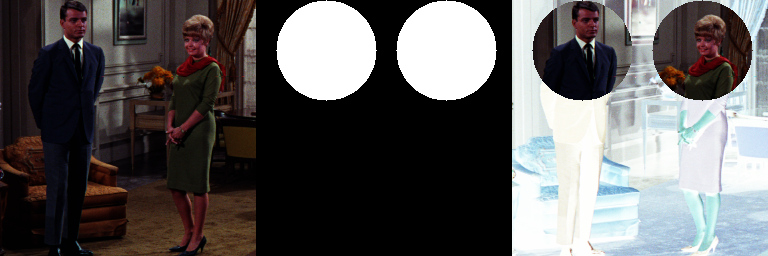

In [51]:
# XOR

mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = ~img ^ mask & mask2
# result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

## Tuliskan hasil analisa anda:



1. NOT (Negasi):
- Hasil operasi NOT (~img) adalah citra yang telah di-negasi.
- Masker mask dan mask2 juga di-negasi (~mask dan ~mask2).
- Hasil ~img & ~mask & ~mask2 adalah citra yang merupakan hasil AND dari ketiga citra yang telah di-negasi. Ini berarti hanya piksel-piksel yang sebelumnya bukan bagian dari masker yang tetap ada dalam hasil.

2. OR (Disjungsi):
- Hasil operasi OR (img | mask | mask2) adalah citra yang merupakan hasil OR dari gambar asli dan kedua masker.
- Hasil ini akan mencakup piksel-piksel yang ada di salah satu dari gambar asli atau kedua masker atau keduanya.

3. AND (Konjungsi):
- Menggunakan dua masker mask dan mask2
- Hasil operasi AND (img & mask & mask2) adalah citra yang hanya mempertahankan piksel-piksel yang berada dalam kedua masker. Piksel-piksel lainnya diatur menjadi putih (255).

4. NAND (Negasi AND):
- menggunakan dua masker mask dan mask2.
- terlebih dahulu menggabungkan kedua masker dengan operasi OR (mask | mask2) untuk mendapatkan masker yang mencakup piksel-piksel yang tidak berada dalam kedua masker.
- menggabungkan gambar asli dengan masker ini dengan operasi AND (~img & mask) untuk mendapatkan citra yang hanya mempertahankan piksel-piksel yang tidak berada dalam kedua masker.

5. XOR (XOR eksklusif):

- Hasil operasi XOR (~img ^ mask & mask2) adalah citra yang merupakan hasil XOR eksklusif antara gambar asli yang telah di-negasi dan hasil AND dari kedua masker.
- Ini berarti piksel-piksel yang ada dalam satu masker tetapi tidak dalam yang lain akan tetap ada dalam hasil, sementara piksel yang ada dalam kedua masker atau tidak ada dalam keduanya akan diabaikan.